In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#통계프로그램 패키지 가져오기 
from scipy.stats import chisquare
from scipy import stats
import scipy as sp 

import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

In [2]:
path = pd.read_csv('./data/spstat1.csv', encoding= "ANSI")

In [3]:
df = pd.DataFrame(path)
df

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1


In [4]:
df.shape

(252, 29)

In [5]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [6]:
df.columns[[1,4,5]]

Index(['사용브랜드', '구매가격', '정보획득'], dtype='object')

In [7]:
#loc 

df.loc[:, '학력':'결혼']

,학력,직업,월수입,결혼
0,2,4,2,2
1,4,4,4,2
2,4,7,4,2
3,2,2,5,3
4,4,9,2,1
...,...,...,...,...
247,7,8,2,1
248,6,4,6,2
249,6,4,3,2
250,2,1,2,1


In [8]:
df.iloc[1:7,2:5]

,사용기간,구매장소,구매가격
1,3,3,20
2,2,1,25
3,5,3,26
4,3,5,30
5,1,4,30
6,5,2,40


In [9]:
df.at[5,"구매가격"] #특정값만 나오게 함.

30

In [10]:
df['구매가격'] < 50 

0       True
1       True
2       True
3       True
4       True
       ...  
247    False
248    False
249    False
250    False
251    False
Name: 구매가격, Length: 252, dtype: bool

In [11]:
condition = df['구매가격'] < 50 

In [12]:
#첨도(kurtosis)

df["구매가격"].kurtosis()

1.3613500036652209

In [13]:
#왜도  (skew)
df["구매가격"].skew()

0.8074518614845148

In [15]:
df["사용브랜드"].value_counts()

사용브랜드
1    127
2    125
Name: count, dtype: int64

In [17]:
from matplotlib import font_manager, rc, rcParams
rc('font', family = 'Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

In [18]:
import platform 

#운영체제 확인 
system = platform.system()

#한글폰트 설정 

if system == 'Darwin': #max이면 
    plt.rc('font', family="AppleGothic")
elif system == 'Windows': 
    plt.rc('font', family = 'Malgun Gothic')
else: #Linux
    plt.rc('font', family = 'NanumGothic')
    
#마이너스 기호(-) 깨짐 방지 
plt.rc('axes', unicode_minus = False)

In [19]:
%matplotlib inline

df['사용브랜드'].replace([1,2],['삼성','애플'])

0      삼성
1      삼성
2      삼성
3      삼성
4      삼성
       ..
247    애플
248    애플
249    애플
250    애플
251    애플
Name: 사용브랜드, Length: 252, dtype: object

In [20]:
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts()

사용브랜드
삼성    127
애플    125
Name: count, dtype: int64

In [ ]:
# 한글 깨짐 방지
# 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [24]:
import matplotlib as mpl #기본 설정 만지는 용도 
import matplotlib.pyplot as plt #그래프 그리는 용도
import matplotlib.font_manager as fm #폰트 관련 용도

print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.8.0
d:\Anaconda\Lib\site-packages\matplotlib\__init__.py
C:\Users\Master\.matplotlib
C:\Users\Master\.matplotlib


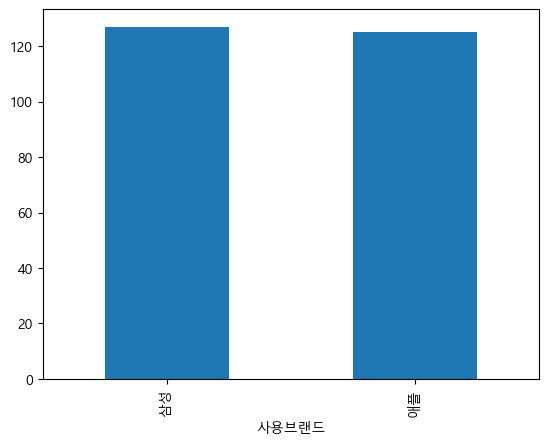

In [26]:
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts().plot(kind='bar')
plt.show()


In [28]:
df['성별'].value_counts()

성별
0    126
1    126
Name: count, dtype: int64

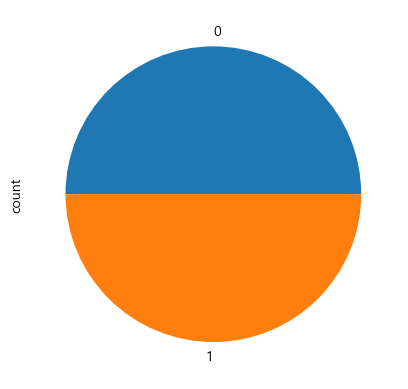

In [29]:
df['성별'].value_counts().plot(kind='pie')
plt.show()


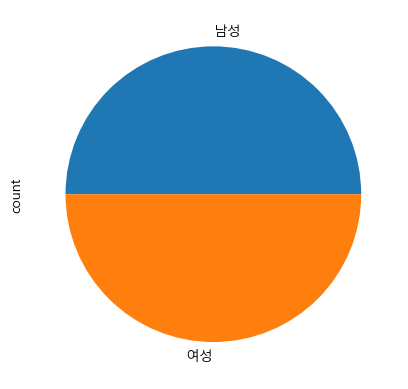

In [32]:
df['성별'].replace([0,1],["남성","여성"]).value_counts().plot(kind='pie')
plt.show()

<Axes: ylabel='count'>

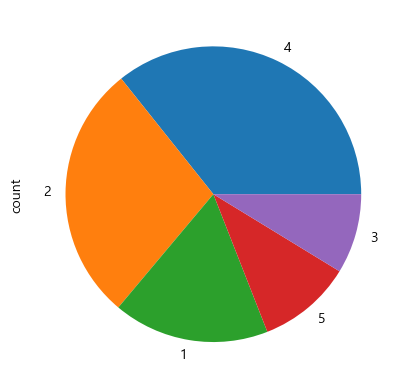

In [34]:
df['구매장소'].value_counts().plot(kind='pie')

In [35]:
#교차 분석 

pd.crosstab(df['월수입'],df["사용브랜드"])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [37]:
# chisquare(df['월수입'],df['사용브랜드']) 

import numpy as np 

fobs = df.월수입      #관찰 빈도수 
fexp = df.사용브랜드  #기대 빈도수 

fexp = fexp * (np.sum(fobs) / np.sum(fexp) )

chisquare(f_obs=fobs, f_exp=fexp)


#pvalue=9.618060771117479e-05 (< 0.05 (5%) alpha 유의수준)
#p-value가 유의수준 alpha ( =0.05)보다 작고 0에 가깝기 때문에 유효함
#고로, 귀무가설이 기각 >> 연구가설 채택


Power_divergenceResult(statistic=343.26420150053593, pvalue=9.618060771117479e-05)

In [39]:
#카이제곱 분석 
#1) c: degree of freedom(자유도)
#2) o: observed value (관측치)
#3) e: expected Value(기대치)



import numpy as np 
fobs= np.array([10,20])
fexp= np.array([30,60])

fexp = fexp * (np.sum(fobs) / np.sum(fexp) )
chisquare(f_obs=fobs, f_exp=fexp)
#pvalue=1.0 >> 전혀 유효하지 않다 

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [40]:
pd.crosstab(df['구매장소'],df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [41]:
chisquare(df['구매장소']) #유효하지않다 

Power_divergenceResult(statistic=148.31174089068827, pvalue=0.9999999645077914)

In [42]:
chisquare(df['구매장소'], ddof=[0,1])

#ddof=[0,1] : degree of freedom(자유도) 보정한 값 
#범주표 행 차원에서 1을 빼고, 열차원은 변경하지 않음 


Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

In [43]:
chisquare(df['월수입'], ddof=[0,1])


Power_divergenceResult(statistic=196.2733118971061, pvalue=array([0.99555742, 0.99491356]))

In [44]:
#T 검정 
#2개의 독립변인(남/여, 삼성/애플) 평균차이 비교

df['구매가격'].values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150,  10,  48,  50,
        50,  70,  70,  70,  70,  75,  80,  80,  80,  80,  89,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [47]:
mean = df['구매가격'].values

mean1 = df[df['사용브랜드']==1].구매가격.values #삼성
mean2 = df[df['사용브랜드']==2].구매가격.values #삼성

C:\Users\Master\AppData\Local\Temp\ipykernel_15272\676699155.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean1, kde=True, fit=sp.stats.norm) #kde 확률밀도함수
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Master\AppData\Local\Temp\ipykernel_15272\676699155.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

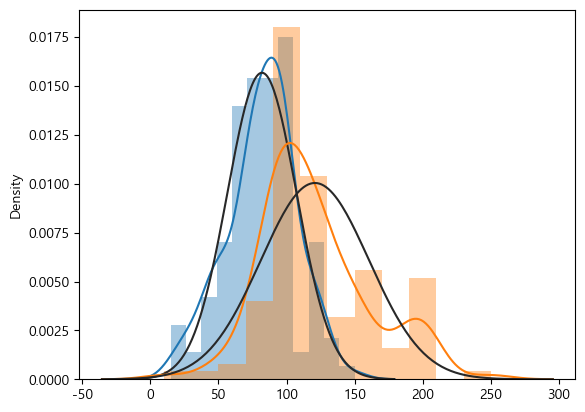

In [52]:
from IPython.core.prefilter import PrefilterChecker 
%matplotlib inline 
import seaborn as sns 

sns.distplot(mean1, kde=True, fit=sp.stats.norm) #kde 확률밀도함수 
sns.distplot(mean2, kde=True, fit=sp.stats.norm) #kde 확률밀도함수 
plt.show()

In [53]:
#정규성 검정 테스트 shapiro test 

print(sp.stats.shapiro(mean1))
print(sp.stats.shapiro(mean2))

#shapiro-wilk test(정규성 검정 테스트)
#H0 (귀무가설), Ha(연구가설, 대립가설)

#여기서는 H0 : normal distribution (정규분포)를 따른다. 

#결과해석
#ShapiroResult(statistic=0.9720977544784546, pvalue=0.009972690604627132)
#mean1의 p-value < 0.05  >> 귀무가설 기각, 대립가설 채택 
#귀무가설인 "정규분포 따른다" 기각 

#ShapiroResult(statistic=0.9252861738204956, pvalue=3.2918255783442874e-06)
#mean2의 p-value < 0.05  >> 귀무가설 기각, 대립가설 채택 
#귀무가설인 "정규분포 따른다" 기각 

ShapiroResult(statistic=0.9720977544784546, pvalue=0.009972690604627132)
ShapiroResult(statistic=0.9252861738204956, pvalue=3.2918255783442874e-06)


In [54]:
#등분산 가정 (르벤 테스트)
#H0(귀무가설) : 두 집단의 분산은 같다. 

sp.stats.levene(mean1, mean2)
#pvalue=0.00030027808643848084 < 0.05
#귀무가설 기각 >> 등분산 가정 위배

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [55]:
#독립표본 T - TEST \
stats.ttest_ind(mean1, mean2, equal_var = False)
#르벤 테스트 결과 등분산 가정 결과를 반영 
#equal_var = True : 등분산 가정 
#equal_var = False : 등분산 가정 위배 

# pvalue=3.598124628532717e-17
# pvalue < 0.05 귀무가설('두 집단의 차이가 없다') 기각


TtestResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17, df=210.54390737951886)

In [57]:
df['재구매의향'].values

array([3, 3, 2, 5, 3, 2, 5, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 4, 3,
       5, 3, 2, 3, 3, 2, 5, 1, 3, 2, 3, 3, 5, 2, 3, 3, 3, 2, 1, 1, 4, 2,
       1, 3, 5, 4, 1, 2, 2, 4, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 2, 3, 5, 1,
       4, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 5, 3, 1, 4, 3, 4, 1, 3, 5, 1, 3,
       5, 3, 5, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 5, 1, 1, 3, 3,
       3, 3, 1, 1, 2, 5, 5, 5, 1, 1, 3, 1, 1, 4, 4, 3, 1, 1, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 5, 2, 5, 2, 2, 1, 2, 1, 2, 2, 3,
       3, 3, 5, 5, 5, 4, 5, 4, 2, 3, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 3,
       1, 2, 2, 3, 1, 4, 3, 2, 2, 2, 2, 5, 5, 4, 5, 3, 4, 2, 3, 2, 3, 3,
       3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 3, 3, 1, 4, 4, 4, 5, 3, 1, 2, 2, 2,
       5, 5, 2, 1, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 2, 5, 3, 2, 4, 3, 4, 5,
       4, 3, 2, 3, 2, 3, 3, 4, 3, 3], dtype=int64)

In [65]:
mean = df['재구매의향'].values

mean1 = df[df['사용브랜드']==1].재구매의향.values
mean2 = df[df['사용브랜드']==2].재구매의향.values


C:\Users\Master\AppData\Local\Temp\ipykernel_15272\676699155.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean1, kde=True, fit=sp.stats.norm) #kde 확률밀도함수
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Master\AppData\Local\Temp\ipykernel_15272\676699155.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

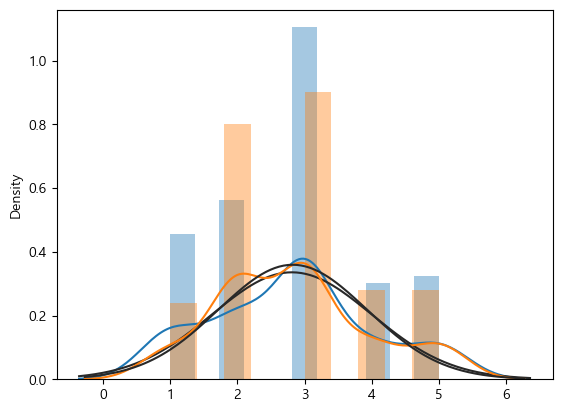

In [66]:
from IPython.core.prefilter import PrefilterChecker 
%matplotlib inline 
import seaborn as sns 

sns.distplot(mean1, kde=True, fit=sp.stats.norm) #kde 확률밀도함수 
sns.distplot(mean2, kde=True, fit=sp.stats.norm) #kde 확률밀도함수 
plt.show()

In [67]:
#정규성 검정 테스트 
print(sp.stats.shapiro(mean1))
print(sp.stats.shapiro(mean2))

#결과해석
#정규성 검정 결과,  p-value < 0.05
#귀무가설 : 두 집단의 평균은 정규성을 띈다 > 기각 
#정규성 검정결과, 정규성 띄지 않음 

ShapiroResult(statistic=0.8974907994270325, pvalue=7.541181901160598e-08)
ShapiroResult(statistic=0.8939266204833984, pvalue=5.995654817070317e-08)


In [69]:
#등분산 가정(르벤 테스트)
sp.stats.levene(mean1, mean2)
#pvalue=0.7315465812585951 > 0.05 
#귀무가설(두 집단의 분산은 같다) 기각 할 수 없음
#등분산 가정 충족 

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)

In [70]:
#독립 표본 T - 검정 

stats.ttest_ind(mean1, mean2, equal_var=True)
#pvalue=0.9290258377820513 > 0.05 
#독립적인 두집단 평균 차이가 없다. 

TtestResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513, df=250.0)

In [74]:
#분산 분석 (ANOVA)
#- 3 집단 이상 평균차이 분석 


#연령2 : 3집단으로 연령대 (10대,20대,30대,,---)
#요인분석 : 공통성을 기준, 요인별로 묶는 것 

anova1 = df[df['연령2'] == 1 ].재구매의향.values
anova2 = df[df['연령2'] == 2 ].재구매의향.values
anova3 = df[df['연령2'] == 3].재구매의향.values


C:\Users\Master\AppData\Local\Temp\ipykernel_15272\3463405929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1, kde=False, fit=sp.stats.norm)
C:\Users\Master\AppData\Local\Temp\ipykernel_15272\3463405929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2, kde=False, fit=sp.stat

<Axes: >

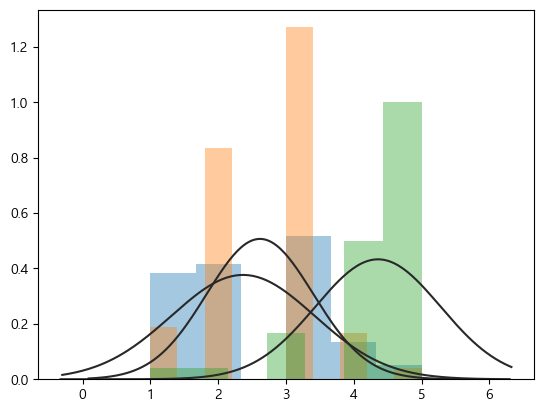

In [75]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

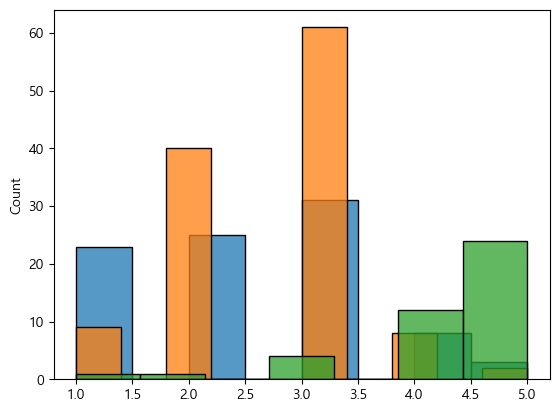

In [76]:
sns.histplot(anova1, kde=False)
sns.histplot(anova2, kde=False)
sns.histplot(anova3, kde=False)


In [77]:
stats.f_oneway(anova1, anova2, anova3)
#pvalue=1.613686022426391e-25 < 0.05
#H0 : 세 집단 간 평균 차이는 없다. 
#귀무가설 기각 >> 연구가설 채택 
#>> 적어도 한 집단은 평균 차이가 있다. 
#ex ) anova1 = anova2 != anova3
#사후 테스트 필요 

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['재구매의향'],
                  groups = df['연령2'],
                  alpha = 0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1276,-0.0526,0.5526,False
1,3,1.9905,0.0,1.585,2.396,True
2,3,1.7405,0.0,1.3514,2.1295,True


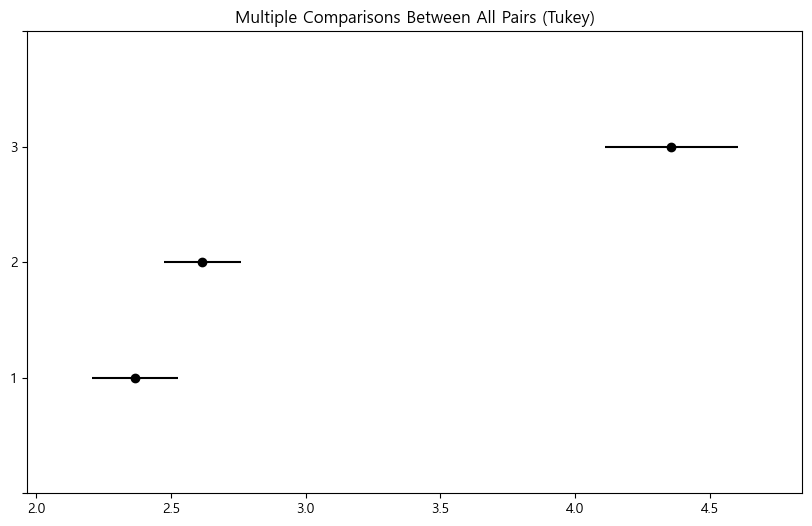

In [80]:
tukey.plot_simultaneous()

plt.vlines(x=49.57, ymin=0.5, ymax=4.5, color='red')

In [83]:
#연령에 따른 구매 가격 차이
anova1 = df[df['연령2'] == 1].구매가격.values
anova2 = df[df['연령2'] == 2].구매가격.values
anova3 = df[df['연령2'] == 3].구매가격.values


In [84]:
stats.f_oneway(anova1, anova2,anova3)
#pvalue=0.44245014422691564 > 0.05 
#귀무가설이 맞음 

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)

C:\Users\Master\AppData\Local\Temp\ipykernel_15272\3463405929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1, kde=False, fit=sp.stats.norm)
C:\Users\Master\AppData\Local\Temp\ipykernel_15272\3463405929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2, kde=False, fit=sp.stat

<Axes: >

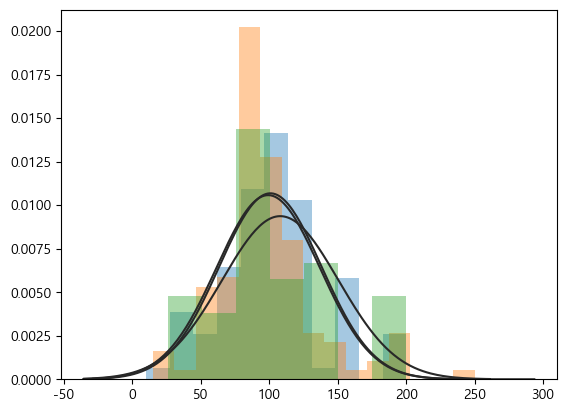

In [86]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)


In [88]:
#상관분석 
sp.stats.pearsonr(df['재구매의향'], df['구입조언'])

PearsonRResult(statistic=0.41783620648818565, pvalue=4.546075388272441e-12)

In [89]:
df.corr(method='pearson')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


In [90]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [91]:
ols(formula='재구매의향 ~ 성별 + 연령 + 학력 + 월수입 + 사용기간 + 구매가격 + 구입조언 + \
    브랜드이미지 + 가격만족도 + 하루사용시간', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     56.03
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.09e-57
Time:                        11:51:20   Log-Likelihood:                -241.54
No. Observations:                 252   AIC:                             505.1
Df Residuals:                     241   BIC:                             543.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3127      0.203     -1.540      0.125      -0.713       0.087
성별             0.0567      0.086      0.663      0.508      -0.112       0.225
연령             0.0601      0.047      1.290      0.198      -0.032       0.152
학력             0.0049      0.025      0.196      0.845      -0.045       0.055
월수입           -0.0404      0.027     -1.508      0.133      -0.093       0.012
사용기간           0.1301      0.034      3.823      0.000       0.063       0.197
구매가격           0.0003      0.001      0.297      0.767      -0.002       0.002
구입조언           0.1226      0.049      2.494      0.013       0.026       0.219
브랜드이미지         0.4475      0.044     10.144      0.000       0.361       0.534
가격만족도          0.3990      0.052      7.664      0.000       0.296       0.502
하루사용시간        -0.0028      0.031     -0.090      0.928      -0.064       0.058
==============================================================================
Omnibus:                        5.050   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.342
Skew:                          -0.238   Prob(JB):                        0.114
Kurtosis:                       2.567   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
ols(formula='재구매의향 ~ 사용기간+브랜드이미지+가격만족도+구입조언'
    , data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.15e-62
Time:                        11:55:57   Log-Likelihood:                -243.50
No. Observations:                 252   AIC:                             497.0
Df Residuals:                     247   BIC:                             514.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3117      0.144     -2.160      0.032      -0.596      -0.027
사용기간           0.1328      0.033      4.023      0.000       0.068       0.198
브랜드이미지         0.4461      0.044     10.236      0.000       0.360       0.532
가격만족도          0.4133      0.048      8.563      0.000       0.318       0.508
구입조언           0.1525      0.039      3.873      0.000       0.075       0.230
==============================================================================
Omnibus:                        5.351   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.625
Skew:                          -0.251   Prob(JB):                       0.0990
Kurtosis:                       2.565   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

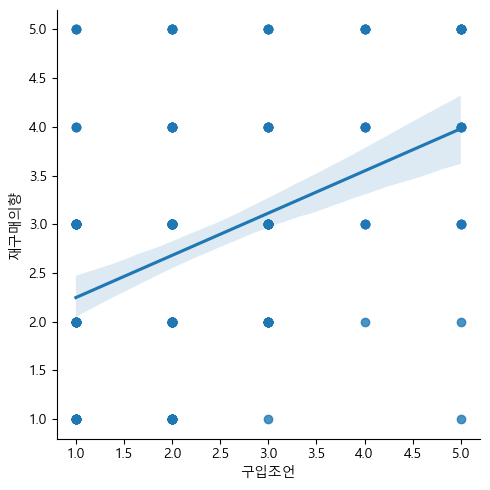

In [96]:
sns.lmplot(y='재구매의향', x='구입조언', data=df)